# Customer Segmentation Analysis - Clustering

### Problem Statement
Customer Personality Analysis is a detailed examination of a company's ideal customers. It enables a business to better understand its customer base, facilitating the customization of products to meet the specific needs, behaviors, and concerns of different customer segments.
This analysis is instrumental in allowing a business to tailor its products effectively. For instance, rather than allocating resources to market a new product to every customer in the company's database, a more strategic approach is to identify which customer segment is most likely to purchase the product. The company can then focus its marketing efforts on this particular segment, optimizing both impact and efficiency.

### Aim
The aim of this project is to perform clustering to identify and summarize distinct customer segments. By doing so, we seek to enable targeted marketing strategies and product customization, aligning offerings with the preferences and needs of each segment. 

### Objective
To segment customers, we plan to implement the K-means clustering algorithm, complemented by the elbow method to determine the optimal number of clusters. Additionally, to manage the complexity and enhance the interpretability of our dataset, we will employ Principal Component Analysis (PCA) for dimensionality reduction.

#### Attributes

*People:
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

*Products:
11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

*Promotion:
17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

*Place:
24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month


## Import libraries

In [113]:
import numpy as np                                     # linear alegbra
import pandas as pd                                    # data processing
import seaborn as sns                                  # ploting graphs
import matplotlib.pyplot as plt
from matplotlib import colors

import datetime
from sklearn.preprocessing import LabelEncoder         # converting categorical to numerical
from sklearn.preprocessing import StandardScaler       # scaling
from sklearn.cluster import KMeans                     # kmeans algorithm
from sklearn.decomposition import PCA

import warnings                                        # for ingore warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_column",None)

In [114]:
df = pd.read_csv('marketing_campaign.csv',delimiter="\t")
df

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
1      2174        1954  Graduation         Single   46344.0        1   
2      4141        1965  Graduation       Together   71613.0        0   
3      6182        1984  Graduation       Together   26646.0        1   
4      5324        1981         PhD        Married   58293.0        1   
5      7446        1967      Master       Together   62513.0        0   
6       965        1971  Graduation       Divorced   55635.0        0   
7      6177        1985         PhD        Married   33454.0        1   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
10     1994        1983  Graduation        Married       NaN        1   
11      387        1976       Basic        Married    7500.0        0   
12     2125        1959  Graduation       Divorced   63033.0        0   
13     8180        1952      Master       Divorced   59354.0        1   
14     2569        1987  Graduation        Married   17323.0        0   
15     2114        1946         PhD         Single   82800.0        0   
16     9736        1980  Graduation        Married   41850.0        1   
17     4939        1946  Graduation       Together   37760.0        0   
18     6565        1949      Master        Married   76995.0        0   
19     2278        1985    2n Cycle         Single   33812.0        1   
20     9360        1982  Graduation        Married   37040.0        0   
21     5376        1979  Graduation        Married    2447.0        1   
22     1993        1949         PhD        Married   58607.0        0   
23     4047        1954         PhD        Married   65324.0        0   
24     1409        1951  Graduation       Together   40689.0        0   
25     7892        1969  Graduation         Single   18589.0        0   
26     2404        1976  Graduation        Married   53359.0        1   
27     5255        1986  Graduation         Single       NaN        1   
28     9422        1989  Graduation        Married   38360.0        1   
29     1966        1965         PhD        Married   84618.0        0   
30     6864        1989      Master       Divorced   10979.0        0   
31     3033        1963      Master       Together   38620.0        0   
32     5710        1970  Graduation       Together   40548.0        0   
33     7373        1952         PhD       Divorced   46610.0        0   
34     8755        1946      Master        Married   68657.0        0   
35    10738        1951      Master         Single   49389.0        1   
36     4339        1970         PhD        Married   67353.0        0   
37    10755        1976    2n Cycle        Married   23718.0        1   
38     8595        1973  Graduation          Widow   42429.0        0   
39     2968        1943         PhD       Divorced   48948.0        0   
40     8601        1980  Graduation        Married   80011.0        0   
41      503        1985      Master        Married   20559.0        1   
42     8430        1957  Graduation       Together   21994.0        0   
43     7281        1959         PhD         Single       NaN        0   
44     2139        1975      Master        Married    7500.0        1   
45     1371        1976  Graduation         Single   79941.0        0   
46     9909        1996    2n Cycle        Married    7500.0        0   
47     7286        1968  Graduation       Together   41728.0        1   
48     7244        1951  Graduation         Single       NaN        2   
49     6566        1954         PhD        Married   72550.0        1   
50     8614        1957  Graduation          Widow   65486.0        0   
51     4114        1964      Master        Married   79143.0        0   
52     1331        1977  Graduation         Single   35790.0        1   
53     2225        1977  Graduation       Divorced   82582.0       

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [116]:
df.describe(include='all')

ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      Recency     MntWines  \
count   2240.000000  2240.000000        2240  2240.000000  2240.000000   
unique          NaN          NaN         663          NaN          NaN   
top             NaN          NaN  31-08-2012          NaN          NaN   
freq            NaN          NaN          12          NaN          NaN   
mean       0.444196     0.506250         NaN    49.109375   303.935714   
std        0.538398     0.544538         NaN    28.962453   336.597393   
min        0.000000     0.000000         NaN     0.000000     0.000000   
25%        0.000000     0.000000         NaN    24.000000    23.750000   
50%        0.000000     0.000000         NaN    49.000000   173.500000   
75%        1.000000     1.000000         NaN    74.000000   504.250000   
max        2.000000     2.000000         NaN    99.000000  1493.000000   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count   2240.000000      2240.000000      2240.000000       2240.000000   
unique          NaN              NaN              NaN               NaN   
top             NaN              NaN              NaN               NaN   
freq            NaN              NaN              NaN               NaN   
mean      26.302232       166.950000        37.525446         27.062946   
std       39.773434       225.715373        54.628979         41.280498   
min        0.000000         0.000000         0.000000          0.000000   
25%        1.000000        16.000000         3.000000          1.000000   
50%        8.000000        67.000000        12.000000          8.000000   
75%       33.000000       232.000000        50.000000         33.000000   
max      199.000000      1725.000000       259.000000        263.000000   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count    2240.000000        2240.000000      2240.000000          2240.000000   
unique           NaN                NaN              NaN                  NaN   
top              NaN                NaN              NaN                  NaN   
freq             NaN                NaN              NaN                  NaN   
mean       44.021875           2.325000         4.084821             2.662054   
std        52.167439           1.932238         2.778714             2.923101   
min         0.000000           0.000000         0.000000             0.000000   
25%         9.000000           1.000000         2.000000             0.000000   
50%        24.000000           2.000000         4.000000             2.000000   
75%        56.000000           3.000000         6.000000             4.000000   
max       362.000000          15.000000        27.000000            28.000000   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count         2240.000000        2240.000000   2240.000000   2240.000000   
unique                NaN                NaN           NaN           NaN   
top                   NaN                NaN           NaN           NaN   
fr

In [117]:
# To check if there are any special characters in place of values
for i in df.columns:
    print({i:df[i].unique()})

{'ID': array([5524, 2174, 4141, ..., 7270, 8235, 9405], dtype=int64)}
{'Year_Birth': array([1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983,
       1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969,
       1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977,
       1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962,
       1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994,
       1941, 1944, 1995, 1940], dtype=int64)}
{'Education': array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)}
{'Marital_Status': array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)}
{'Income': array([58138., 46344., 71613., ..., 56981., 69245., 52869.])}
{'Kidhome': array([0, 1, 2], dtype=int64)}
{'Teenhome': array([0, 1, 2], dtype=int64)}
{'Dt_Customer': array(['04-09-2012', '08-03-2014', '21-08-2013', '10-02-2014',
       '19-01-2014', '09-09-2013', '13-11-2012

In [118]:
missing_values = pd.DataFrame({'missing_count': df.isnull().sum(), 
                               'missing_percent': round((df.isnull().sum()/len(df)) * 100,3)})
missing_values

missing_count  missing_percent
ID                               0            0.000
Year_Birth                       0            0.000
Education                        0            0.000
Marital_Status                   0            0.000
Income                          24            1.071
Kidhome                          0            0.000
Teenhome                         0            0.000
Dt_Customer                      0            0.000
Recency                          0            0.000
MntWines                         0            0.000
MntFruits                        0            0.000
MntMeatProducts                  0            0.000
MntFishProducts                  0            0.000
MntSweetProducts                 0            0.000
MntGoldProds                     0            0.000
NumDealsPurchases                0            0.000
NumWebPurchases                  0            0.000
NumCatalogPurchases              0            0.000
NumStorePurchases                0            0.000
NumWebVisitsMonth                0            0.000
AcceptedCmp3                     0            0.000
AcceptedCmp4                     0            0.000
AcceptedCmp5                     0            0.000
AcceptedCmp1                     0            0.000
AcceptedCmp2                     0            0.000
Complain                         0            0.000
Z_CostContact                    0            0.000
Z_Revenue                        0            0.000
Response                         0            0.000

In [119]:
df.duplicated().sum()

0

#### Inference : 
1. The dataset consists of 29 fields and 2240 records, including both integer and object data types. The 'object' data types need to be converted into integers for further modeling.
2. The dataset is free of duplicate values and special characters.
3. However, it does contain a few null values in the 'Income' column which is imputed using fillna.
4. The 'Education' and 'Marital_Status' fields contain multiple unnecessary categorical values that need to be dealt with.
5. 'Kidhome' and 'Teenhome' represent similar concepts but are distinct fields.
6. The 'Dt_Customer' field, which represents the date of the customer's enrollment with the company, is currently in object data type and will be converted to DateTime format for better analysis.
7. 'Z_CostContact' and 'Z_Revenue' are singularity variables, which can be dropped as no significant insight can be gained from them.

#### Treating Missing Values

In [120]:
df.Income.fillna(df.Income.median(),inplace=True)

#### Feature selection and Engineering

In [121]:
# Convert 'Dt_customer' to datetime type
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
# Check data type after converting
print('Dt_Customer type: ',df["Dt_Customer"].dtype)

Dt_Customer type:  datetime64[ns]


In [122]:
# Check the earliest and latest date time
print('Earliest customer enrollment date: ', df['Dt_Customer'].min())
print('latiest customer enrollment date: ', df['Dt_Customer'].max())

Earliest customer enrollment date:  2012-07-30 00:00:00
latiest customer enrollment date:  2014-06-29 00:00:00


In [123]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts())
print("------------------------")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
------------------------
Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


In [124]:
#Age of customer as of today 
df["Age"] = 2023-df["Year_Birth"]

#Total spendings on various items
df["Total_Min_Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ \
df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Marital_Status"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", 
                                                   "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", 
                                         "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                      "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#For totaling all purchase
df['Total_purchases'] = df['NumWebPurchases'] +df['NumCatalogPurchases'] + df['NumStorePurchases']

#Dropping some of the redundant features
to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df.drop(to_drop, axis=1,inplace = True)

Deleting "Z_CostContact" & "Z_Revenue" sue to it's high singularity, for "Year_Birth" we have created Age Variable and ID is reduntant.

In [125]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age', 'Total_Min_Spent', 'Children',
       'Total_purchases'],
      dtype='object')

In [126]:
# Create 'Seniority'(in weeks) feature. 
last_date =  df['Dt_Customer'].max()
df['lastest_date'] = (last_date -df['Dt_Customer']).dt.days/7   # in weeks.

# 'Dt_Customer' is now redundant. Remove
df.drop(['Dt_Customer'], axis=1, inplace=True)

Dt_Custeomer' ranges from around mid of 2012 to 2014,hence creating latest customer enrollment date as the date point for calculation is reasonable.

#### EDA

In [127]:
# Divide features by discrete and continuous

# Function to seperate discrete and continuous features in original data (won't work after PCA or Clustering)
def divide_feature_types(data):
        '''
        inpute a data frame and output continuous, and discrete feature columns in list format
        '''
        # Initialize
        col_cont=[] 
        col_dis=[] 
        # loop through and seperate columns
        for c in data.columns: 
            if ('home' in c) or ('Num' in c) or ('Accepted' in c) or (c=='Complain') or (c=='Response'): 
                col_dis.append(c)
            elif (data[c].dtype=='O'):
                col_dis.append(c)
            else:
                col_cont.append(c)
        return col_cont, col_dis

# Call the function and get column lists
col_cont, col_dis = divide_feature_types(df)
print('Continuous numerical features: ', col_cont)
print('Categorical or discrete features: ', col_dis)

Continuous numerical features:  ['Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'Age', 'Total_Min_Spent', 'Children', 'Total_purchases', 'lastest_date']
Categorical or discrete features:  ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


IndexError: index 6 is out of bounds for axis 0 with size 6

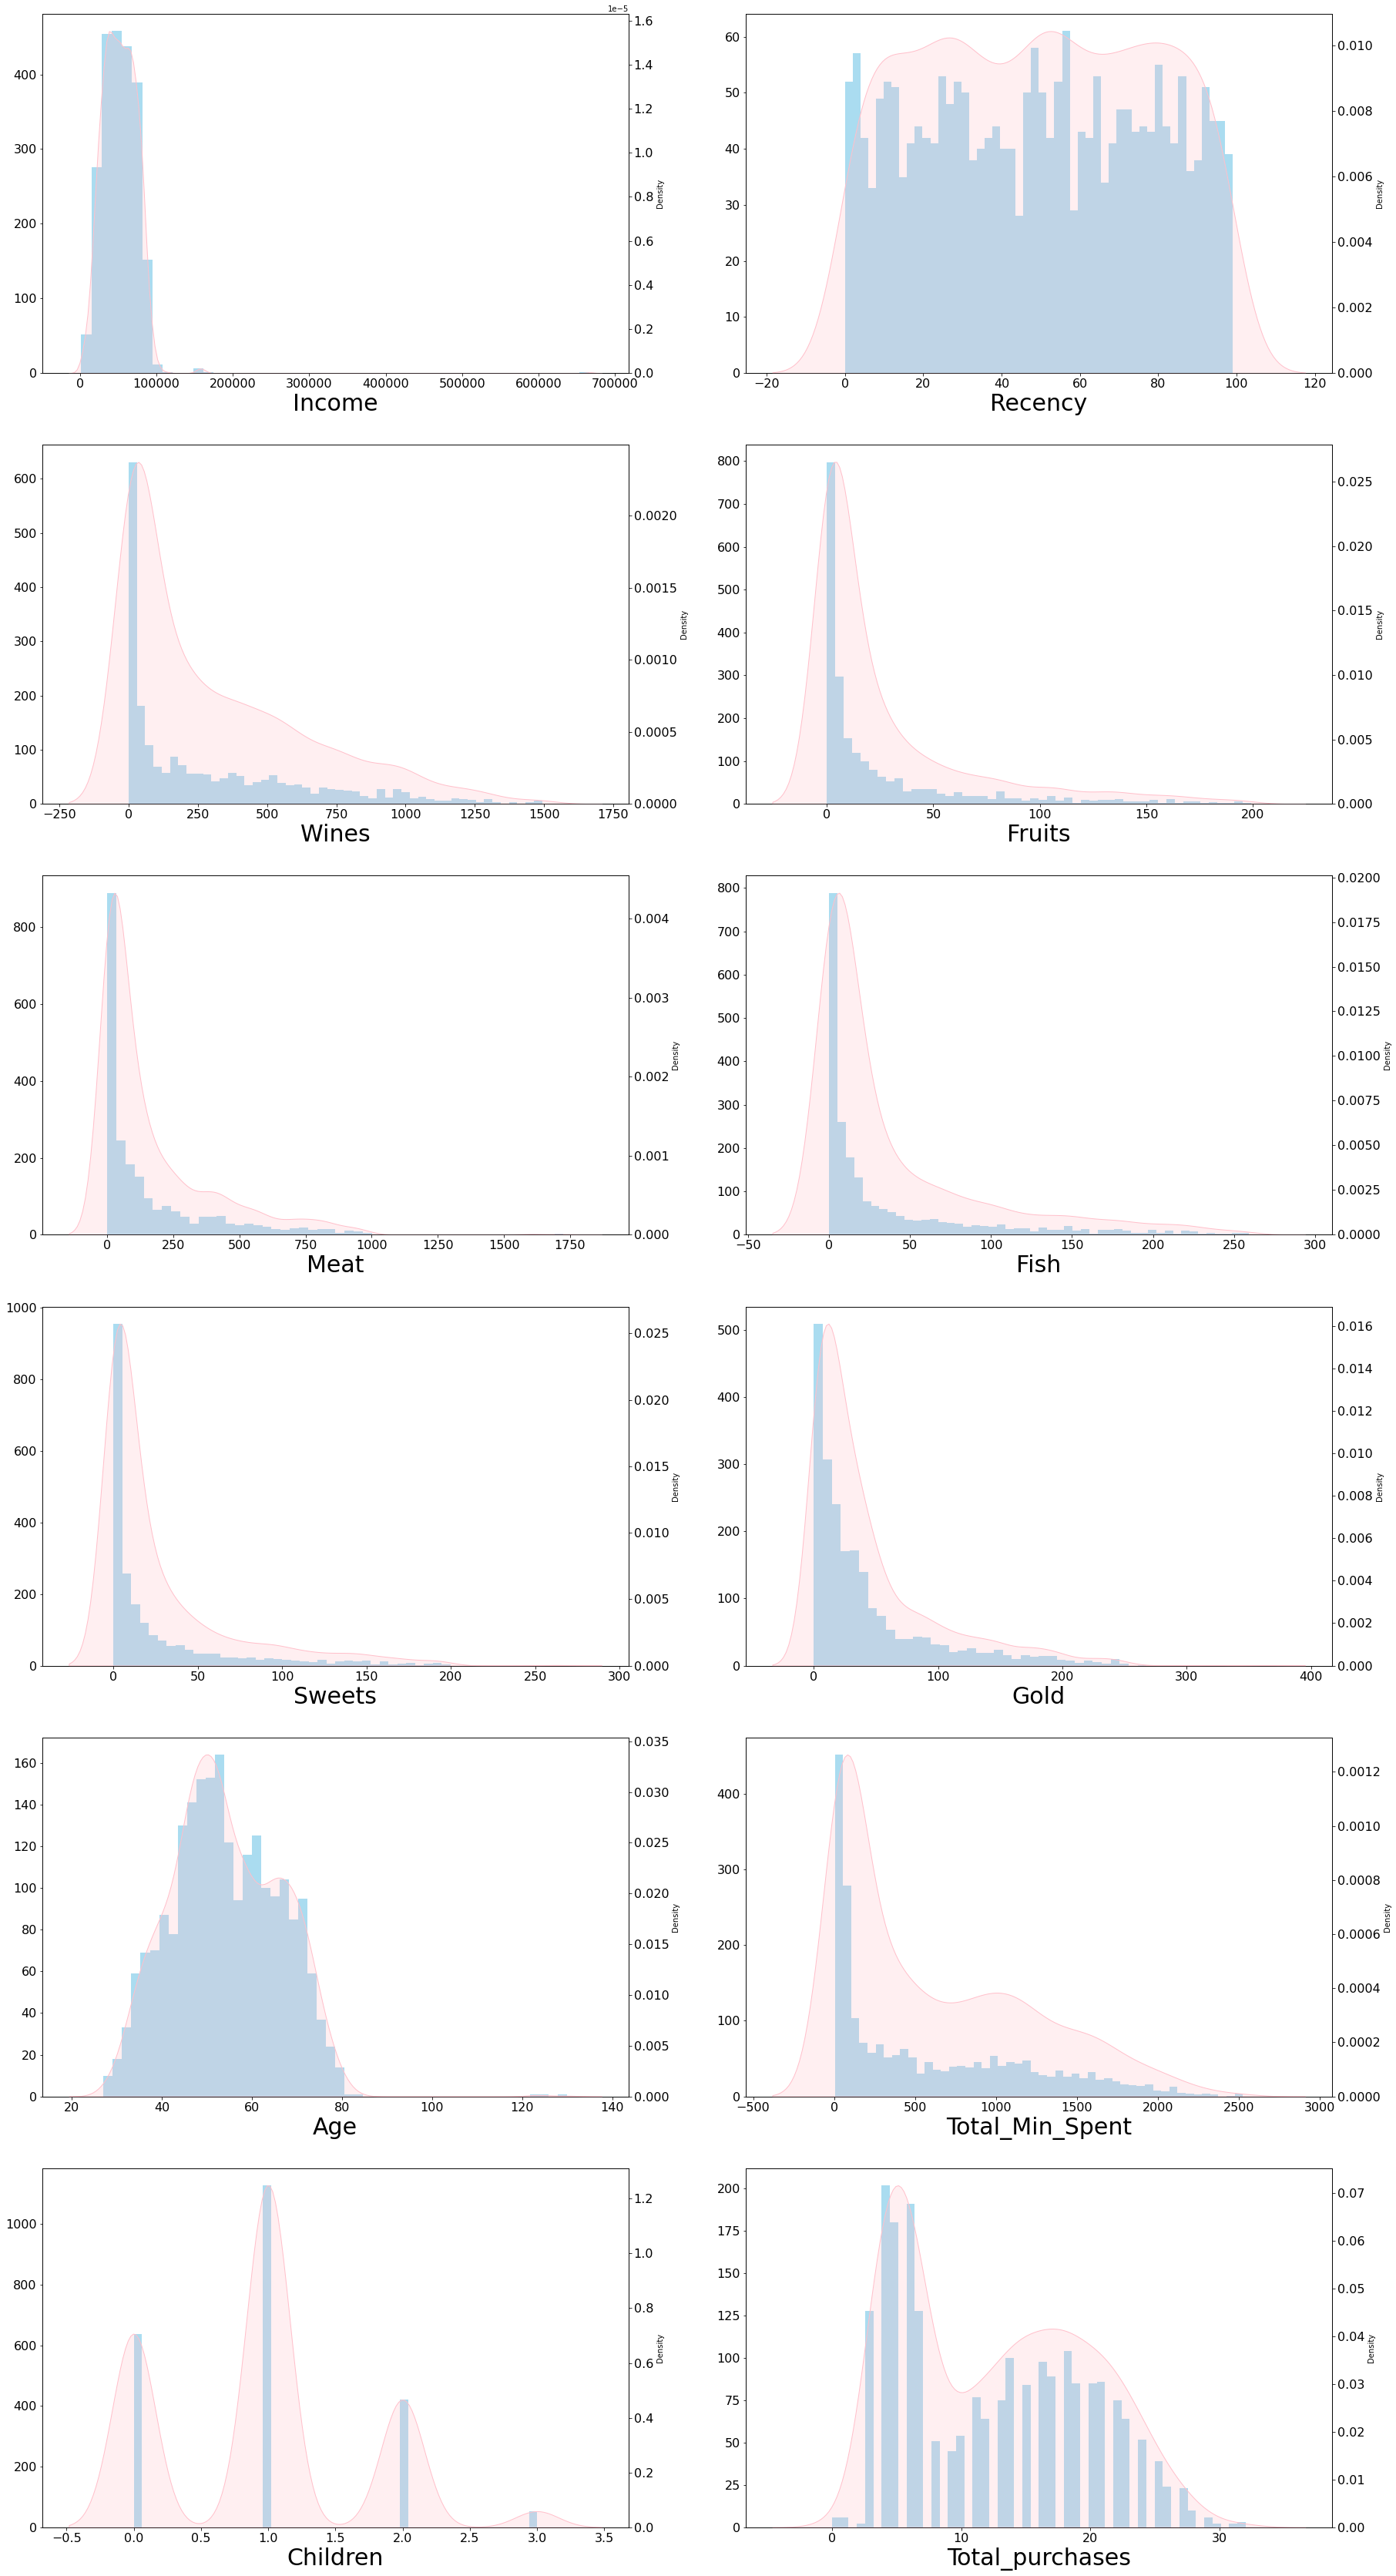

In [128]:
# Histogram and kdeplot for all continuous features 
grh_per_row = 2
fig, ax = plt.subplots(len(col_cont) // grh_per_row , grh_per_row, figsize=(30, 60))

for count, feature in enumerate(col_cont, 0):
    df_copy = df.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row

    # Plot histogram on the primary y-axis
    ax[row, col].hist(df_copy[feature], bins=50, alpha=0.7, color='skyblue', label='Histogram')
    ax[row, col].set_xlabel(feature, fontsize=30)
    
    # Plot KDE plot on the secondary y-axis
    ax2 = ax[row, col].twinx()
    sns.kdeplot(df_copy[feature], fill=True, color='pink', ax=ax2, label='KDE Plot')
    ax[row, col].tick_params(axis='both', labelsize=16)
    ax2.tick_params(axis='both', labelsize=16)

plt.show()

We can observe that most products, in terms of minutes spent, exhibit right skewness, with 'Total_Min_Spent' showing the most pronounced right skew. This is likely because it represents the sum of all minutes spent across products. Both Age and Income distributions appear to closely follow a normal distribution, although they may contain some outliers.

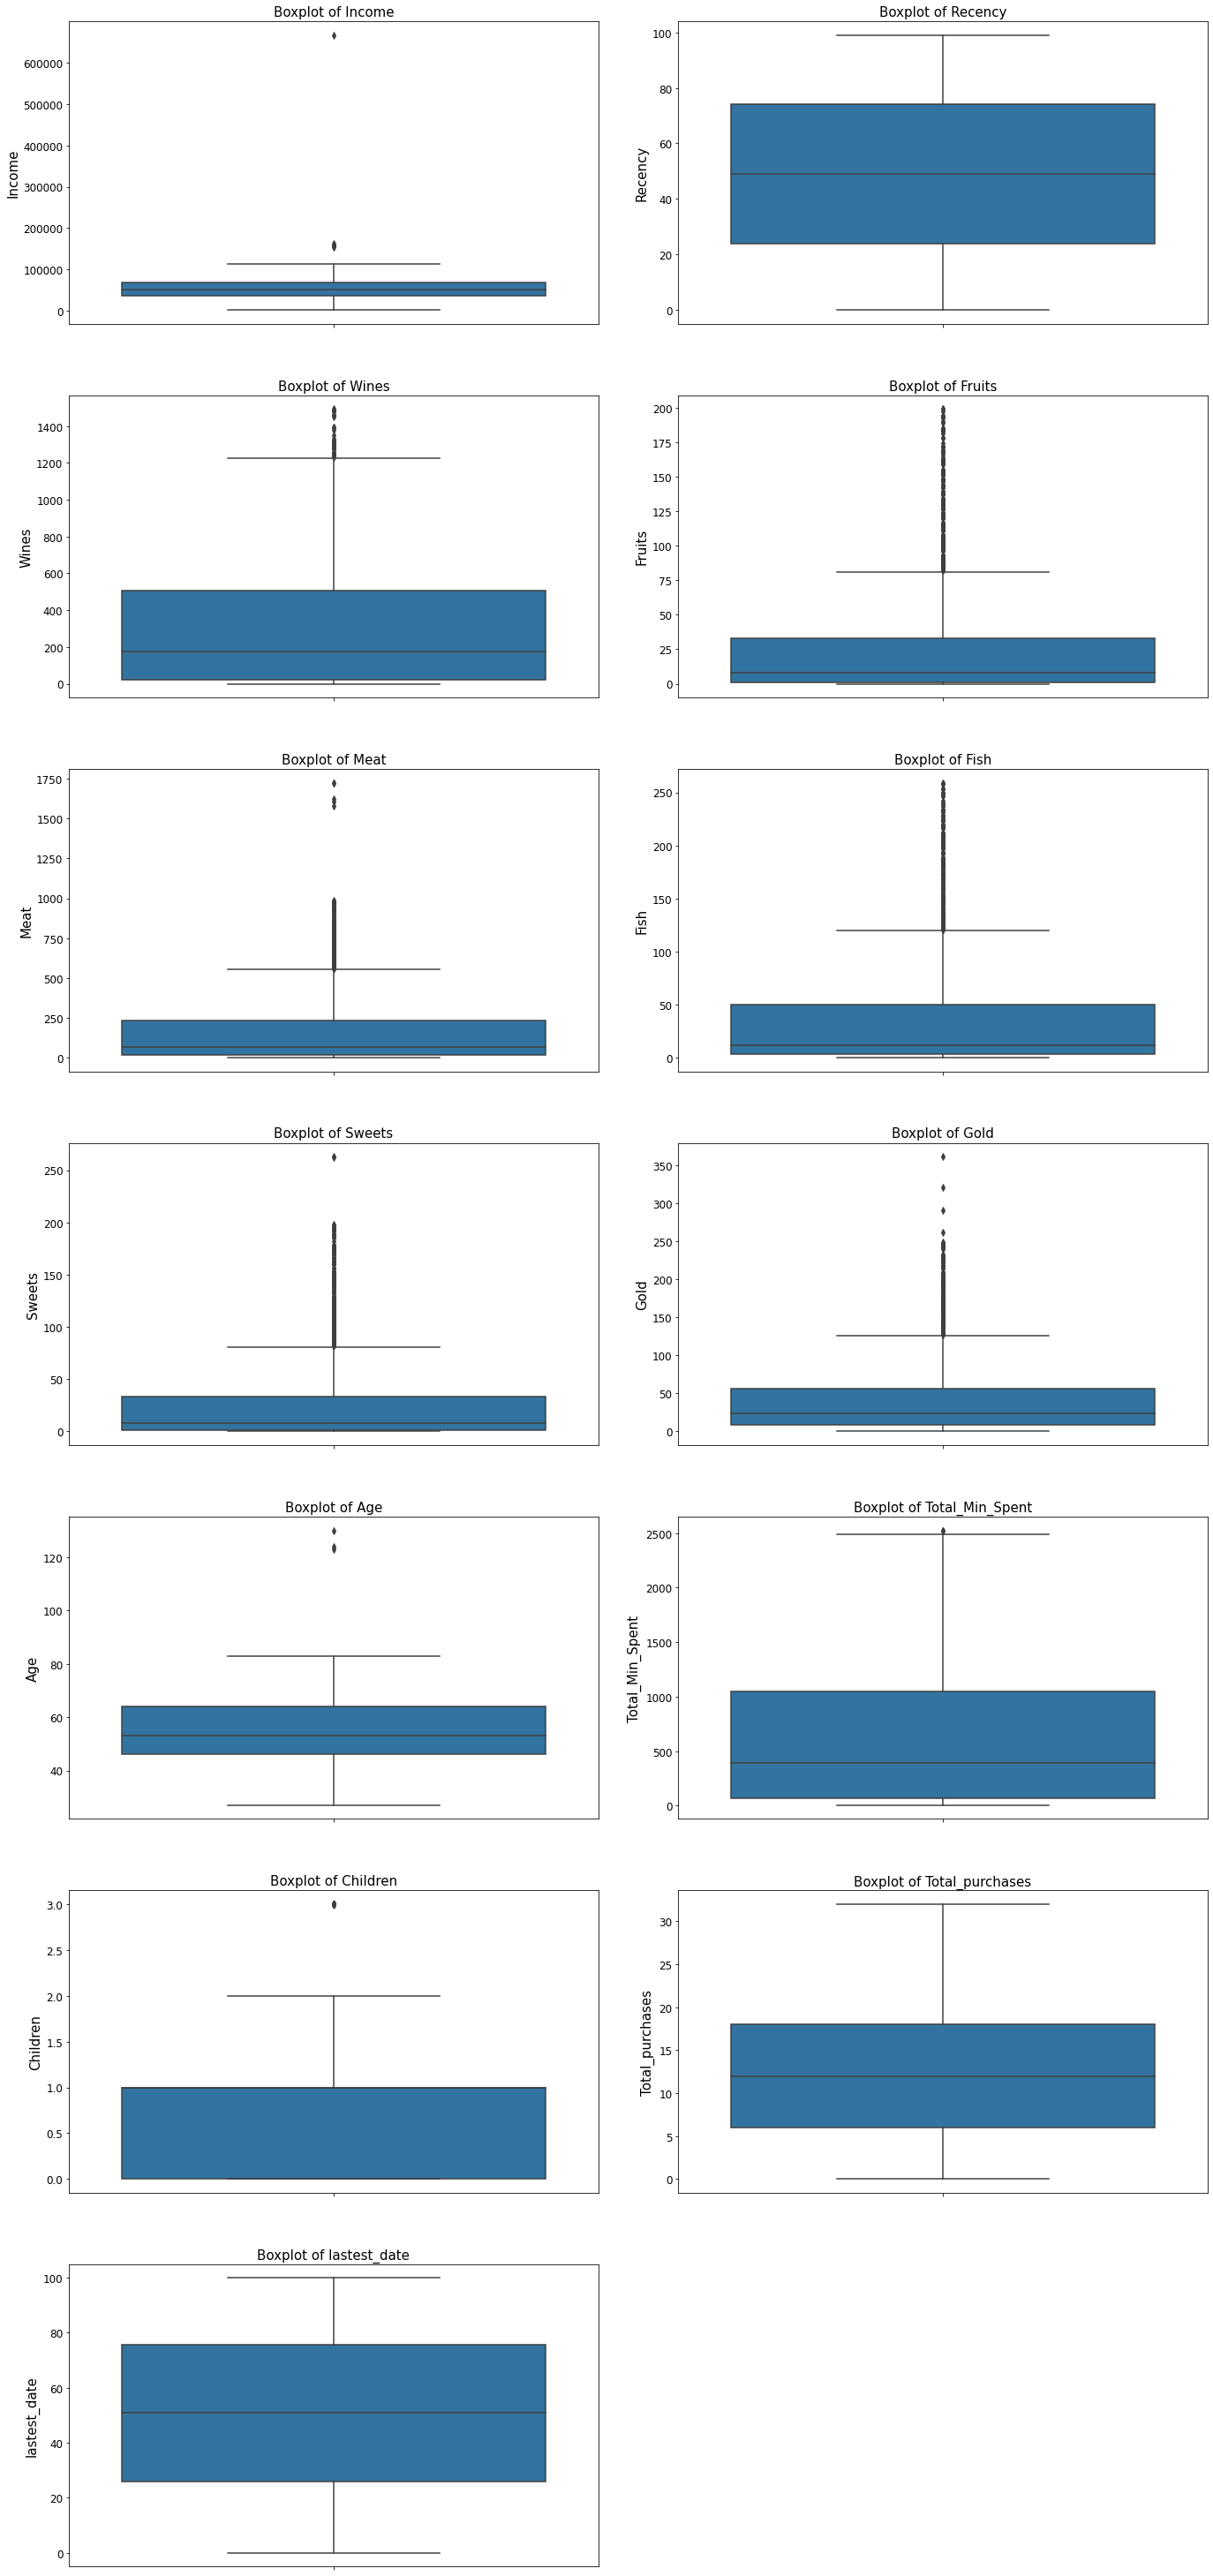

In [131]:
# Calculate the number of rows needed for subplots (2 plots per row)
num_rows = len(col_cont) // 2 + (len(col_cont) % 2 > 0)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 6 * num_rows))  # Adjust figsize as needed
fig.tight_layout(pad=6.0)  # Adjust spacing between plots

for i, feature in enumerate(col_cont):
    row = i // 2
    col = i % 2
    
    # If the total number of variables is odd, the last row will have one empty subplot
    if len(col_cont) % 2 != 0 and i == len(col_cont) - 1:
        sns.boxplot(y=df[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {feature}', fontsize=15)
        axes[row, col].set_ylabel(feature, fontsize=15)
        axes[row, col].tick_params(axis='both', labelsize=12)
        axes[row, col+1].axis('off')  # Hide the empty subplot
    else:
        sns.boxplot(y=df[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Boxplot of {feature}', fontsize=15)
        axes[row, col].set_ylabel(feature, fontsize=15)
        axes[row, col].tick_params(axis='both', labelsize=12)

plt.show()

In [132]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
df.shape

(2236, 29)

Based on the boxplots, numerous outliers are observable, but many are clustered together, indicating that they may not need to be addressed. Only the Age and Income variables exhibit genuine outliers that warrant concern. Consequently, these outliers have been addressed appropriately.

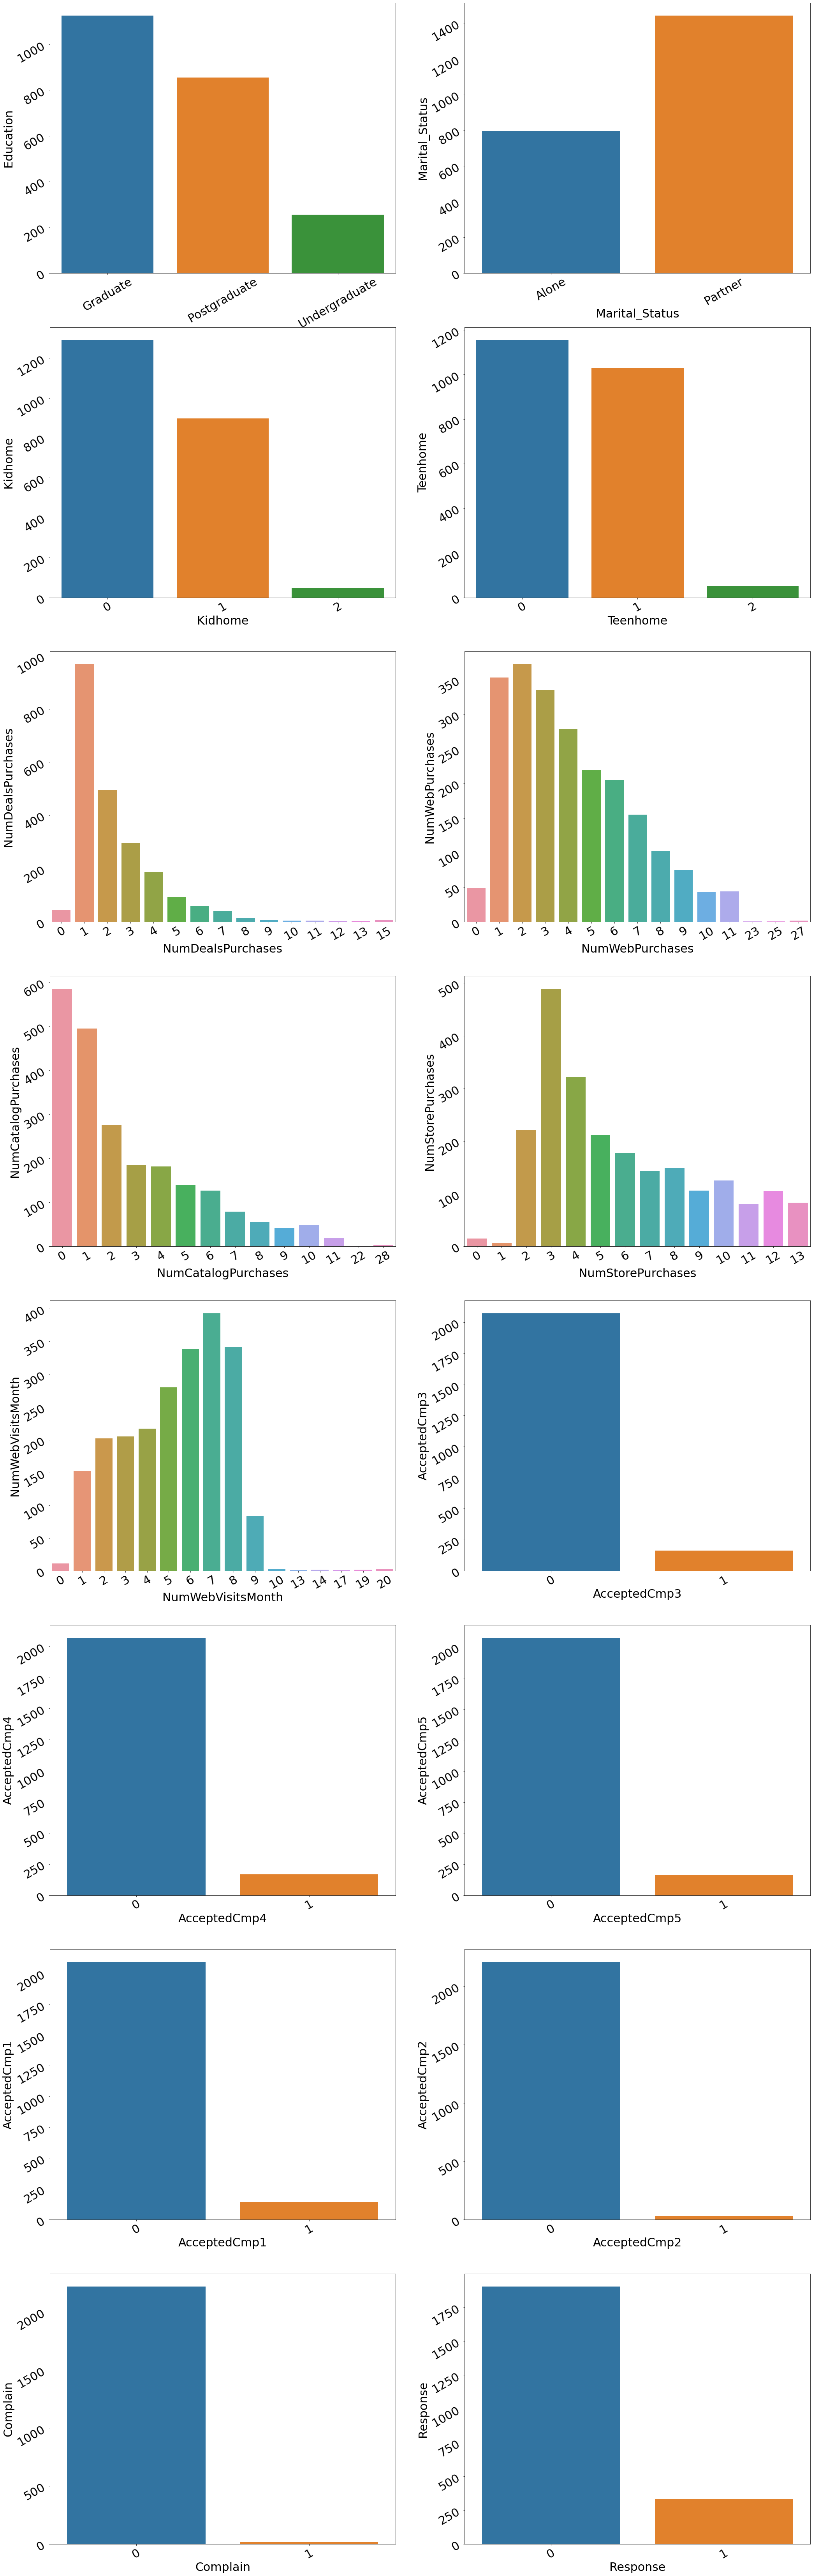

In [133]:
# Countplot for discrete features
grh_per_row = 2
fig, ax = plt.subplots(len(col_dis) // grh_per_row, grh_per_row, figsize=(35, 120))

for count, feature in enumerate(col_dis, 0):
    df_copy = df.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row
    sns.countplot(x=feature, data=df_copy,  ax=ax[row, col])  # Specify the axis for the countplot
    ax[row, col].set_xlabel(feature)
    ax[row, col].set_ylabel("Count") 
    
   # Set labels and axis labels font size
    ax[row, col].set_xlabel(feature, fontsize=30)
    ax[row, col].set_ylabel(feature, fontsize=30)
    ax[row, col].tick_params(axis='both', labelsize=30, rotation=30)

plt.show()

1. We can infer that the majority of customers primarily have a graduate or postgraduate educational background.
2. Most customers have partners, with a significant portion having no children.
3. Observing the purchase modes, we can conclude that in-store purchases are preferred, with catalogue purchases being the least popular.
4. Based on the Acceptance Campaign data, it appears that the acceptance rate is low.

##### Catogorical label encoding

In [134]:
# Encode categorical features
categorical_features = ['Education', 'Marital_Status']
le=LabelEncoder()
for i in categorical_features:
    df[i]=df[[i]].apply(le.fit_transform)

##### Scaling

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int32  
 1   Marital_Status       2236 non-null   int32  
 2   Income               2236 non-null   float64
 3   Kidhome              2236 non-null   int64  
 4   Teenhome             2236 non-null   int64  
 5   Recency              2236 non-null   int64  
 6   Wines                2236 non-null   int64  
 7   Fruits               2236 non-null   int64  
 8   Meat                 2236 non-null   int64  
 9   Fish                 2236 non-null   int64  
 10  Sweets               2236 non-null   int64  
 11  Gold                 2236 non-null   int64  
 12  NumDealsPurchases    2236 non-null   int64  
 13  NumWebPurchases      2236 non-null   int64  
 14  NumCatalogPurchases  2236 non-null   int64  
 15  NumStorePurchases    2236 non-null   i

In [136]:
#Standard scaler

scaler = StandardScaler()
scaler.fit(df)
df_new = pd.DataFrame(scaler.transform(df),columns= df.columns)
df_new.shape

(2236, 29)

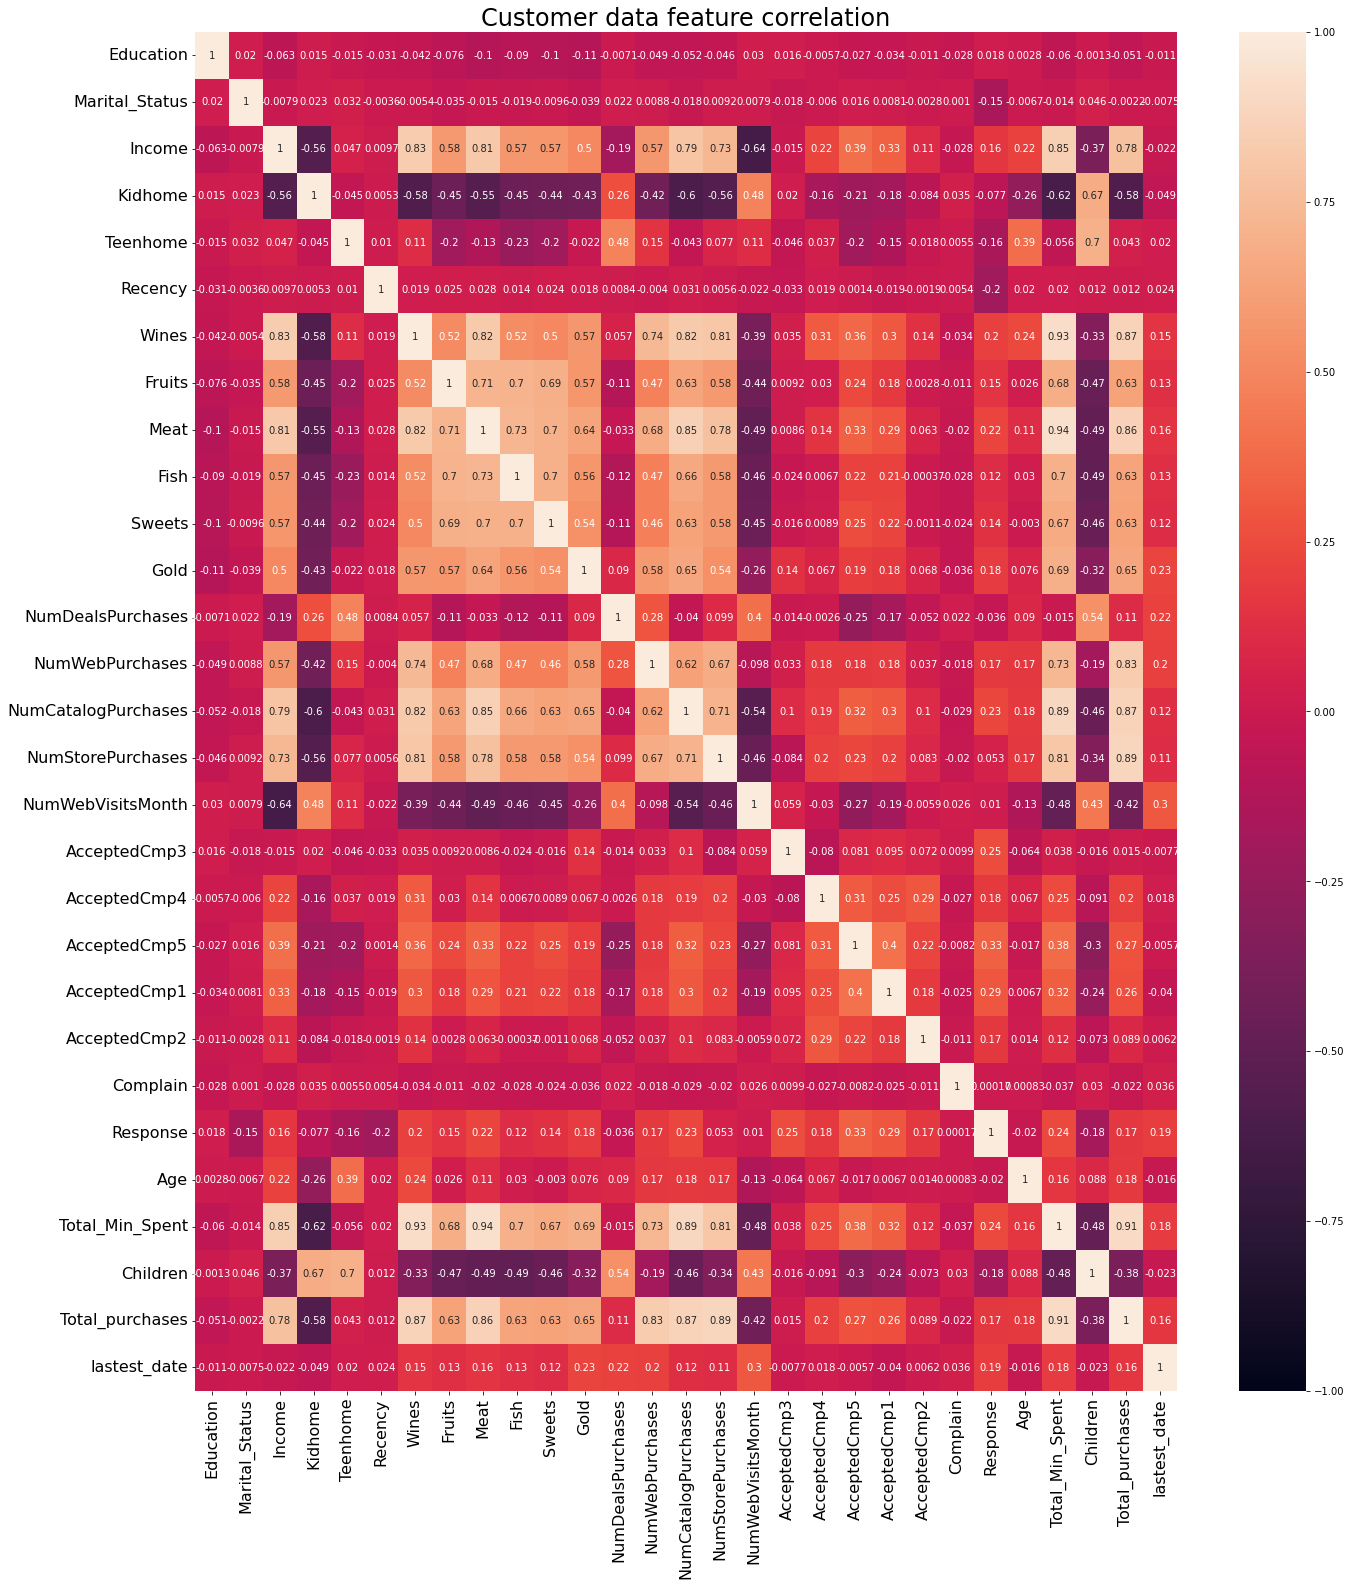

In [139]:
#Now all features are numerical, I can use heatmap to check feature correlations
corr = df.corr(method='spearman')
plt.figure(figsize=(22, 25))
plt.title("Customer data feature correlation", fontsize=24)
sns.heatmap(data=corr, annot=True,vmax=1.0,vmin=-1.0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

1. Income'， 'Wines','Meat', 'NumCatalogPurchases', 'NumStorePurchases'  & 'Taotal_Min_Spent' have strong positive correlations.
2. 'Kidhome' has moderate negative correlations with 'Income' and all products purchases.
3. 'Kidhome' has moderate positive correlations with 'NumWebVisitsMonth'.
4. 'Teenhome' has moderate positive correlations with 'NumDealsPurchases'
5. 'NumWebVisitsMonth' has moderate negative correlations with 'NumCatalogPurchases', 'NumStorePurchases'
6. 'NumWebVisitsMonth' has moderate positive correlations with 'Kidhome' and 'NumDealsPurchases'.

#### Model Building

Determing the clusters for K-means using PCA & Elbow method.

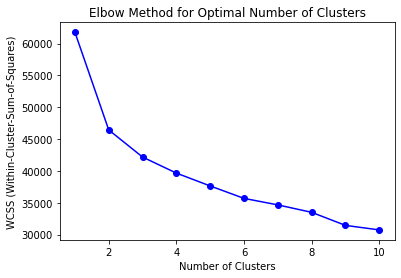

In [140]:
# Elbow method to decide on clustering

# PCA with 95% variance restricting
pca = PCA(n_components=0.95)
pca.fit(df_new)
df_pca =  pd.DataFrame(pca.transform(df_new)) 

# Get within-cluster-sum-of-squares for Elbow Method 
wcss = []  

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=77)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

In [141]:
n_component = pca.explained_variance_ratio_*100
print(n_component)
len(n_component)

[30.07484311  8.601937    6.63784332  5.47325643  4.08580262  3.87011872
  3.6040096   3.45544482  3.43107886  3.27316258  2.97967228  2.73066347
  2.584712    2.16310055  2.09202945  1.99190583  1.93534376  1.75585682
  1.59186348  1.51317176  1.43688886]


21

We can observe that 3 clusters has to be formed.

In [142]:
# building K-means with 3 clusters (and PCA with retaining 95% of variance)

# PCA 
pca = PCA(n_components=0.95)
pca.fit(df_new)
df_pca =  pd.DataFrame(pca.transform(df_new)) 

# Kmeans and predictions
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_pred = kmeans.fit_predict(df_pca)
df["Clusters"]= y_pred
df

Education  Marital_Status    Income  Kidhome  Teenhome  Recency  Wines  \
0             0               0   58138.0        0         0       58    635   
1             0               0   46344.0        1         1       38     11   
2             0               1   71613.0        0         0       26    426   
3             0               1   26646.0        1         0       26     11   
4             1               1   58293.0        1         0       94    173   
5             1               1   62513.0        0         1       16    520   
6             0               0   55635.0        0         1       34    235   
7             1               1   33454.0        1         0       32     76   
8             1               1   30351.0        1         0       19     14   
9             1               1    5648.0        1         1       68     28   
10            0               1   51381.5        1         0       11      5   
11            2               1    7500.0        0         0       59      6   
12            0               0   63033.0        0         0       82    194   
13            1               0   59354.0        1         1       53    233   
14            0               1   17323.0        0         0       38      3   
15            1               0   82800.0        0         0       23   1006   
16            0               1   41850.0        1         1       51     53   
17            0               1   37760.0        0         0       20     84   
18            1               1   76995.0        0         1       91   1012   
19            2               0   33812.0        1         0       86      4   
20            0               1   37040.0        0         0       41     86   
21            0               1    2447.0        1         0       42      1   
22            1               1   58607.0        0         1       63    867   
23            1               1   65324.0        0         1        0    384   
24            0               1   40689.0        0         1       69    270   
25            0               0   18589.0        0         0       89      6   
26            0               1   53359.0        1         1        4    173   
27            0               0   51381.5        1         0       19      5   
28            0               1   38360.0        1         0       26     36   
29            1               1   84618.0        0         0       96    684   
30            1               0   10979.0        0         0       34      8   
31            1               1   38620.0        0         0       56    112   
32            0               1   40548.0        0         1       31    110   
33            1               0   46610.0        0         2        8     96   
34            1               1   68657.0        0         0        4    482   
35            1               0   49389.0        1         1       55     40   
36            1               1   67353.0        0         1       37    702   
37            2               1   23718.0        1         0       76      6   
38            0               0   42429.0        0         1       99     55   
39            1               0   48948.0        0         0       53    437   
40            0               1   80011.0        0         1        3    421   
41            1               1   20559.0        1         0       88     13   
42            0               1   21994.0        0         1        4      9   
43            1               0   51381.5        0         0       80     81   
44            1               1    7500.0        1         0       19      3   
45            0               0   79941.0        0         0       72    123   
46            2               1    7500.0        0         0       24      3   
47            0               1   41728.0        1         0       92     13   
48            0               0   51381.5        2         1       96     48   
49    

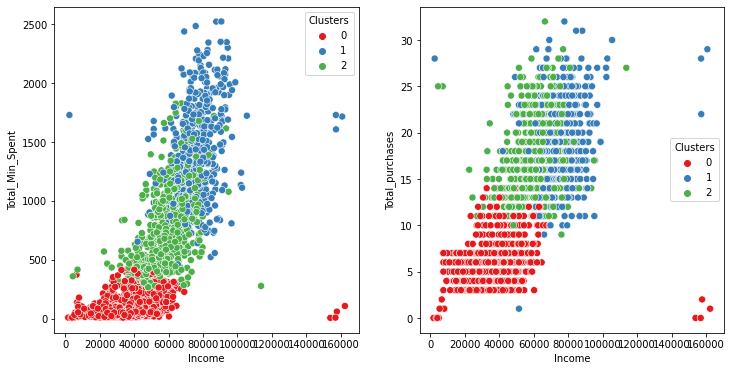

In [151]:
# Create a figure and a 1x2 subplot structure
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First plot
sns.scatterplot(data=df, x='Income', y='Total_Min_Spent',
                hue='Clusters', palette='Set1', ax=ax[0], s=50)

# Second plot
sns.scatterplot(data=df, x='Income', y='Total_purchases',
                hue='Clusters', palette='Set1', ax=ax[1], s=50)

# Show the plots
plt.show()

<AxesSubplot:xlabel='Clusters', ylabel='count'>

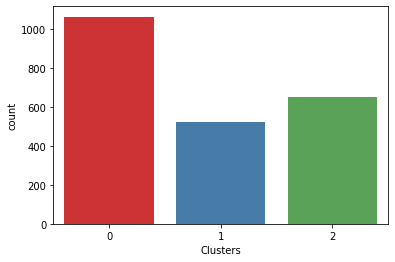

In [153]:
sns.countplot(data=df,x='Clusters',palette='Set1')

Conclusion:-
1. We can infer that cluster 0 represents customers with low income who additionally spend the least amount of time shopping and do not purchase much.
2. Whereas cluster 1 consists of customers with high income who spend a significant amount of time shopping, their number of purchases is almost the same as that of cluster 2.
3. Lastly, cluster 2 comprises customers with moderate income who spend a medium amount of time shopping, yet their number of purchases is high.
4. We can infer that the distribution of cluster 0 is the highest, followed by cluster 2, with cluster 1 being the least